In [1]:
# Data Preparation

# Tourism in Ireland

# Source 1
# https://www.cso.ie/en/statistics/tourismandtravel/
## Tourism and Travel
### Household Travel Survey
#### Household Travel Survey Quarter 3 2023

# Datasets
## Name HTQ01: Travel by Irish Residents - Reason for Journey
## Filename: ./datasets/HTQ01.20240316T180315_TravelByIrishResidents_ReasonForJourney.csv

# Name HTQ17: Domestic Travel by Irish Residents - Reason for Journey, Region Visited
## Filename: ./datasets/HTQ17.20240317T090350_DomesticTravelByIrishResidents_ReasonDestination.csv

# Source 2
# https://www.failteireland.ie/Research-and-Insights.aspx

# Source 3
# https://www.tourismireland.com/research-and-insights#/


In [32]:
import pandas as pd
import seaborn as sns
from skimpy import skim
from summarytools import dfSummary

In [7]:
ds1 = pd.read_csv("./datasets/HTQ01.20240316T180315_TravelByIrishResidents_ReasonForJourney.csv")

In [8]:
ds1.head()

,STATISTIC,Statistic Label,TLIST(Q1),Quarter,C02276V02746,Domestic,C02599V03153,Reason for Journey,UNIT,VALUE
0,HTQ01C1,Number of Trips by Irish Residents,2000Q1,2000Q1,1,Domestic,-,All reasons for journey,Thousand,1169.0
1,HTQ01C1,Number of Trips by Irish Residents,2000Q1,2000Q1,1,Domestic,01,Holiday,Thousand,408.0
2,HTQ01C1,Number of Trips by Irish Residents,2000Q1,2000Q1,1,Domestic,02,Business,Thousand,161.0
3,HTQ01C1,Number of Trips by Irish Residents,2000Q1,2000Q1,1,Domestic,03,Visiting friends/relatives,Thousand,468.0
4,HTQ01C1,Number of Trips by Irish Residents,2000Q1,2000Q1,1,Domestic,08,Other reasons,Thousand,132.0


In [9]:
ds1.shape

(3480, 10)

In [10]:
ds1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3480 entries, 0 to 3479
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   STATISTIC           3480 non-null   object 
 1   Statistic Label     3480 non-null   object 
 2   TLIST(Q1)           3480 non-null   object 
 3   Quarter             3480 non-null   object 
 4   C02276V02746        3480 non-null   int64  
 5   Domestic            3480 non-null   object 
 6   C02599V03153        3480 non-null   object 
 7   Reason for Journey  3480 non-null   object 
 8   UNIT                3480 non-null   object 
 9   VALUE               3416 non-null   float64
dtypes: float64(1), int64(1), object(8)
memory usage: 272.0+ KB


In [11]:
# Data seems clean

In [14]:
ds2 = pd.read_csv("./datasets/HTQ17.20240317T090350_DomesticTravelByIrishResidents_ReasonDestination.csv")

In [15]:
ds2.head()

,STATISTIC,Statistic Label,TLIST(Q1),Quarter,C02599V03153,Reason for Journey,C02196V04140,Region Visited,UNIT,VALUE
0,HTQ17C01,Number of Trips by Irish Residents,20181,2018Q1,-,All reasons for journey,-,State,Thousand,2118.0
1,HTQ17C01,Number of Trips by Irish Residents,20181,2018Q1,-,All reasons for journey,IE04,Northern and Western,Thousand,431.0
2,HTQ17C01,Number of Trips by Irish Residents,20181,2018Q1,-,All reasons for journey,IE041,Border,Thousand,NaN
3,HTQ17C01,Number of Trips by Irish Residents,20181,2018Q1,-,All reasons for journey,IE042,West,Thousand,NaN
4,HTQ17C01,Number of Trips by Irish Residents,20181,2018Q1,-,All reasons for journey,IE05,Southern,Thousand,1038.0


In [21]:
ds2.shape

(4140, 10)

In [26]:
ds2.describe(include='all')

,STATISTIC,Statistic Label,TLIST(Q1),Quarter,C02599V03153,Reason for Journey,C02196V04140,Region Visited,UNIT,VALUE
count,4140,4140,4140.000000,4140,4140,4140,4140,4140,4140,1317.000000
unique,3,3,NaN,23,5,5,12,12,2,NaN
top,HTQ17C01,Number of Trips by Irish Residents,NaN,2018Q1,-,All reasons for journey,-,State,Thousand,NaN
freq,1380,1380,NaN,180,828,828,345,345,2760,NaN
mean,NaN,NaN,20206.347826,NaN,NaN,NaN,NaN,NaN,NaN,667.365148
std,NaN,NaN,16.548662,NaN,NaN,NaN,NaN,NaN,NaN,1476.741229
min,NaN,NaN,20181.000000,NaN,NaN,NaN,NaN,NaN,NaN,1.100000
25%,NaN,NaN,20192.000000,NaN,NaN,NaN,NaN,NaN,NaN,2.900000
50%,NaN,NaN,20204.000000,NaN,NaN,NaN,NaN,NaN,NaN,126.000000
75%,NaN,NaN,20222.000000,NaN,NaN,NaN,NaN,NaN,NaN,673.000000


In [16]:
ds2["Reason for Journey"].value_counts()

Reason for Journey
All reasons for journey       828
Holiday                       828
Business                      828
Visiting friends/relatives    828
Other reasons                 828
Name: count, dtype: int64

In [17]:
ds2["Quarter"].value_counts()

Quarter
2018Q1    180
2021Q1    180
2023Q2    180
2023Q1    180
2022Q4    180
2022Q3    180
2022Q2    180
2022Q1    180
2021Q4    180
2021Q3    180
2021Q2    180
2020Q4    180
2018Q2    180
2020Q3    180
2020Q2    180
2020Q1    180
2019Q4    180
2019Q3    180
2019Q2    180
2019Q1    180
2018Q4    180
2018Q3    180
2023Q3    180
Name: count, dtype: int64

In [18]:
ds2["Region Visited"].value_counts()

Region Visited
State                   345
Northern and Western    345
Border                  345
West                    345
Southern                345
Mid-West                345
South-East              345
South-West              345
Eastern and Midland     345
Dublin                  345
Mid-East                345
Midland                 345
Name: count, dtype: int64

In [20]:
ds2["VALUE"].isnull().sum()

2823

array([[<Axes: title={'center': 'VALUE'}>]], dtype=object)

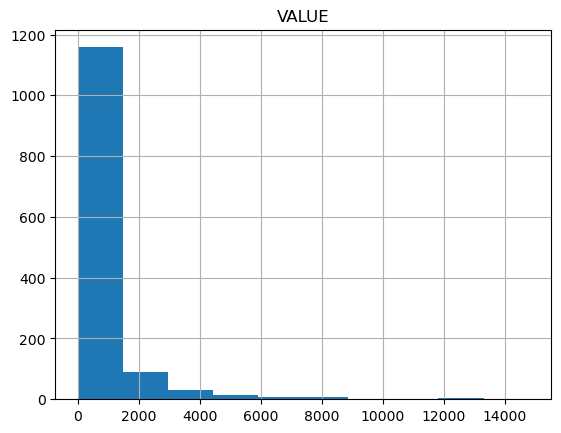

In [23]:
ds2.hist(column='VALUE')

array([[<Axes: title={'center': 'VALUE'}>]], dtype=object)

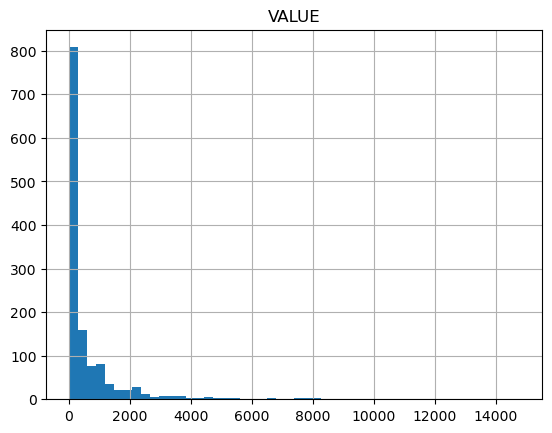

In [24]:
ds2.hist(column='VALUE', bins=50)

In [28]:
skim(ds2)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 4140   │ │ string      │ 8     │                                                          │
│ │ Number of columns │ 10     │ │ int64       │ 1     │                                                          │
│ └───────────────────┴────────┘ │ float64     │ 1     │                                                          │
│                                └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━━┓  │
│ ┃ column_name    ┃ NA     ┃ NA %    ┃ mean    ┃ sd    ┃ p0     ┃ p25    ┃ p50    ┃ p75    ┃ p100   ┃ hist    ┃  │
│ ┡━━━━━━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━━┩  │
│ │ TLIST(Q1)      │      0 │       0 │   20000 │    17 │  20000 │  20000 │  20000 │  20000 │  20000 │ ▇▇▇▇▇▆  │  │
│ │ VALUE          │   2823 │   68.19 │     670 │  1500 │    1.1 │    2.9 │    130 │    670 │  15000 │    ▇    │  │
│ └────────────────┴────────┴─────────┴─────────┴───────┴────────┴────────┴────────┴────────┴────────┴─────────┘  │
│                                                     string                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━┓  │
│ ┃ column_name                        ┃ NA     ┃ NA %      ┃ words per row             ┃ total words          ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━┩  │
│ │ STATISTIC                          │      0 │         0 │                         1 │                 4140 │  │
│ │ Statistic Label                    │      0 │         0 │                       6.3 │                26220 │  │
│ │ Quarter                            │      0 │         0 │                         1 │                 4140 │  │
│ │ C02599V03153                       │      0 │         0 │                         1 │                 4140 │  │
│ │ Reason for Journey                 │      0 │         0 │                         2 │                 8280 │  │
│ │ C02196V04140                       │      0 │         0 │                         1 │                 4140 │  │
│ │ Region Visited                     │      0 │         0 │                       1.3 │                 5520 │  │
│ │ UNIT                               │      0 │         0 │                       1.7 │                 6900 │  │
│ └────────────────────────────────────┴────────┴───────────┴───────────────────────────┴──────────────────────┘  │
╰────────────────────────────────────────────────────── End ──────────────────────────────────────────────────────╯

In [31]:
summary = dfSummary(ds2)
summary

No,Variable,Stats / Values,Freqs / (% of Valid),Graph,Missing
1,STATISTIC[object],1. HTQ17C012. HTQ17C023. HTQ17C03,"1,380 (33.3%)1,380 (33.3%)1,380 (33.3%)","<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAJsAAABFCAYAAABdVZTTAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjcuMiwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy8pXeV/AAAACXBIWXMAAA9hAAAPYQGoP6dpAAABZUlEQVR4nO3bQWrCYBSF0ZcSSp0kBMHFuIgutovIbkT8B23pJB10aGeV+4s9ZwVP+FAiucO2bQUJT70P4P8YqmpXVc+9D7mhr23bPnofwbVxv9+/TtO09D7kVlpr52EY3gR3f8Zpmpbj8fgxz/Nn72P+6nK5vKzrupxOp+eqEtudGauq5nn+PBwO772PuZFd7wP4nQcEYsRGjNiIERsxYiNGbMSIjRixESM2YsRGjNiIERsxYiNGbMSMVT/vgfU+5BYe5XM8qrG1dl7XdakHeQ+stXauqq/ed3DNBoGYwZSPFN9sxFhXEWNdRYx1FTH+1CVGbMSIjRixESM2YsRGjNiIERsxYiNGbMSIjRixESM2YsRGjHUVMdZVxNggEGNdRYwHBGL8jBJjykeMKR8xpnzEeEAgRmzEiI0YsREjNmLERozYiBEbMWIjRmzEiI0YsREjNmLERowpHzGmfMTYIBBjykfMN77xo0reSBZ8AAAAAElFTkSuQmCC"">",0(0.0%)
2,Statistic Label[object],1. Number of Trips by Irish Resid2. Number of Nights by Irish Resi3. Average Length of Stay by Iris,"1,380 (33.3%)1,380 (33.3%)1,380 (33.3%)","<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAJsAAABFCAYAAABdVZTTAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjcuMiwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy8pXeV/AAAACXBIWXMAAA9hAAAPYQGoP6dpAAABZUlEQVR4nO3bQWrCYBSF0ZcSSp0kBMHFuIgutovIbkT8B23pJB10aGeV+4s9ZwVP+FAiucO2bQUJT70P4P8YqmpXVc+9D7mhr23bPnofwbVxv9+/TtO09D7kVlpr52EY3gR3f8Zpmpbj8fgxz/Nn72P+6nK5vKzrupxOp+eqEtudGauq5nn+PBwO772PuZFd7wP4nQcEYsRGjNiIERsxYiNGbMSIjRixESM2YsRGjNiIERsxYiNGbMSMVT/vgfU+5BYe5XM8qrG1dl7XdakHeQ+stXauqq/ed3DNBoGYwZSPFN9sxFhXEWNdRYx1FTH+1CVGbMSIjRixESM2YsRGjNiIERsxYiNGbMSIjRixESM2YsRGjHUVMdZVxNggEGNdRYwHBGL8jBJjykeMKR8xpnzEeEAgRmzEiI0YsREjNmLERozYiBEbMWIjRmzEiI0YsREjNmLERowpHzGmfMTYIBBjykfMN77xo0reSBZ8AAAAAElFTkSuQmCC"">",0(0.0%)
3,TLIST(Q1)[int64],Mean (sd) : 20206.3 (16.5)min < med < max:20181.0 < 20204.0 < 20233.0IQR (CV) : 30.0 (1221.0),23 distinct values,"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAKoAAABGCAYAAABc8A97AAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjcuMiwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy8pXeV/AAAACXBIWXMAAA9hAAAPYQGoP6dpAAACaElEQVR4nO3av8raUBjH8efoq8Q/RESqm0vHQoeMXkQvtpfQwStw6NLJTRCJmL7BGNOtS+HVk2Oa/OD7mX3OkfBFCTyuqioDuq7X9hcAnvH26APOuZGZDWuef62q6r3mLPDXh6E650aLxeJbHMfzOoefz+eTc+47sSLUo1/UYRzH881m8z6bzXKfg9M0jbbb7fx4PA7NjFAR5OFfv5nZbDbLl8vl7xrnj2rMAP/gZQoSCBUSCBUSCBUSCBUSCBUSCBUSCBUSCBUSCBUSCBUSCBUSCBUSntqeakubS9ssjPtr8pl1NtQ2l7ZZGPfX9DPrbKjW7tI2C+P+Gn1mXQ7VzNpd2mZh3F9Tz4yXKUggVEggVEggVEggVEggVEggVEggVEggVEggVEggVEggVEggVEjo/PaUorIsB2YWO+fqjPfM7B5wfch8yGx8v98HNWcfItQXy7JsUBTF1/V63e/3+157mWVZDrIs+zydTn/1er3C9+6Q+dC7i6KIyrL8kuf5DzOrs+b3IUJ9sev1+hZF0ThJkny1Wp18Zvf7/Xy3231KkuSn72zo/IvuHt9ut77v7DMItSGTycR7gfh0Oo3qzobOv+rupvAyBQmECgmECgmECgmECgmECgmECgmECgmECgmECgmECgmECgmNLqUE7mUG7Te2eTder7FQQ/YyzcL2G9u8G81oLNSQvUyzsP3GNu9GMxrfR21zv7Gru5Xwx8sUJBAqJBAqJBAqJBAqJBAqJBAqJBAqJBAqJBAqJBAqJBAqJBAqJDy1PZWmaeR78OVyiczMsiyLDofD+H/Oq96t+r1D55/p6w8JHo3RrfmAswAAAABJRU5ErkJggg=="">",0(0.0%)
4,Quarter[object],1. 2018Q12. 2021Q13. 2023Q24. 2023Q15. 2022Q46. 2022Q37. 2022Q28. 2022Q19. 2021Q410. 2021Q311. other,"180 (4.3%)180 (4.3%)180 (4.3%)180 (4.3%)180 (4.3%)180 (4.3%)180 (4.3%)180 (4.3%)180 (4.3%)180 (4.3%)2,340 (56.5%)","<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAJsAAAD+CAYAAAAtWHdlAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjcuMiwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy8pXeV/AAAACXBIWXMAAA9hAAAPYQGoP6dpAAADh0lEQVR4nO3cQWoaYQCG4d8iodkoIniYHKKH7SG8jYizaEI2dtFAmqDJYtq3YJ9n2dkM4WVkhv/r4nw+Dyh8+dc3wP9DbGTERkZsZMRGRmxkxEZGbGTERmYxxrgfY9xduf58Pp8fw/vhhi232+231Wq1uXRxmqbjYrH4Ljj+hOVqtdo8PDw8rtfrp98vnE6nr/v9fnM4HO7GGGJjtuUYY6zX66fdbvfjwvX7+H64YV4QyIiNjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MiIjYzYyIiNzHKMX2fX3l+49G8wx3KapuN+v9+MC2fXpmk6jjGe+9viFtkgkFn4L7OoeLKRsa4iY11FxrqKjI+6ZMRGRmxkxEZGbGTERkZsZMRGRmxkxEZGbGTERkZsZAxeyBi8kHEsnIzBCxlPNjIGL2QMXsgYvJDxUZeM2MiIjYzYyIiNjNjIiI2M2MiIjYzYyIiNjNjIiI2MwQsZgxcyjoWTMXgh4wWBjJ9RMtZVZKyryFhXkfGCQEZsZMRGRmxkxEZGbGTERkZsZMRGRmxkxEZGbGTERsa6iox1FRnHwslYV5HxZCNj8ELG4IWM

In [34]:
# Read csv from url
url = "https://ws.cso.ie/public/api.restful/PxStat.Data.Cube_API.ReadDataset/HTQ21/CSV/1.0/en"


In [38]:
df = pd.read_csv(url)

In [39]:
df.head()

,STATISTIC,Statistic Label,TLIST(Q1),Quarter,C02276V02746,Destination,UNIT,VALUE
0,HTQ21C01,Number of Same Day Trips by Irish Residents,2018Q1,2018Q1,1,Domestic,Thousand,2688.0
1,HTQ21C01,Number of Same Day Trips by Irish Residents,2018Q1,2018Q1,2,Outbound,Thousand,218.0
2,HTQ21C01,Number of Same Day Trips by Irish Residents,2018Q2,2018Q2,1,Domestic,Thousand,3068.0
3,HTQ21C01,Number of Same Day Trips by Irish Residents,2018Q2,2018Q2,2,Outbound,Thousand,145.0
4,HTQ21C01,Number of Same Day Trips by Irish Residents,2018Q3,2018Q3,1,Domestic,Thousand,3472.0


In [40]:
df.shape

(92, 8)

In [ ]:
dfSummary(df)